In [1]:
from sane import SANEAlgorithm
from sane import Cancer1Dataset
import random
import matplotlib.pyplot as plt

In [2]:
random.seed(1)

In [3]:
algorithm_params = [
        (50, 1000, 5, 4),
        (50, 1000, 5, 8),
        (50, 1000, 25, 4),
        (50, 1000, 25, 8),
        (1500, 2000, 35, 10)
]

In [4]:
algorithms = []
for params in algorithm_params:
        algorithms.append(SANEAlgorithm(
                blueprints_population_size=params[0],
                neuron_population_size=params[1],
                hidden_layer_size=params[2],
                connections_count=params[3]))

In [5]:
for i in range(len(algorithms)):
        algorithms[i].init(min_value=-1.0, max_value=1.0)

In [6]:
cancer1_dataset = Cancer1Dataset()
x_train, y_train = cancer1_dataset.get_train_data()

In [7]:
results = []
for i in range(len(algorithms)):
        result = algorithms[i].train(
            generations_count=50, x_train=x_train, y_train=y_train)
        results.append(result)

49/50 best fitness = 0.15441184559259735, current fitness = 0.20677211098244886

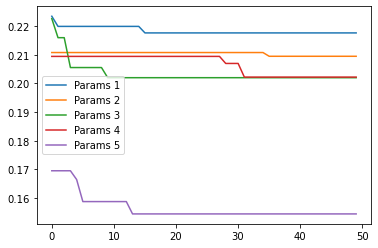

In [8]:
legend = []
for i in range(len(results)):
       plt.plot(results[i])
       legend.append("Params " + str(i+1))
plt.legend(legend)
plt.show()

In [9]:
x_test, y_test = cancer1_dataset.get_test_data()

In [10]:
results = []
for i in range(len(algorithms)):
        result = algorithms[i].test(
            x_test=x_test, y_test=y_test)
        results.append(result)

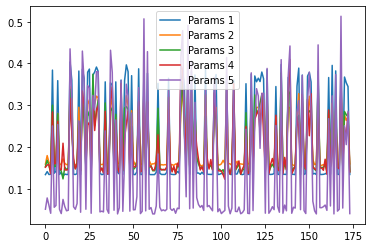

In [11]:
legend = []
for i in range(len(results)):
       plt.plot(results[i])
       legend.append("Params " + str(i+1))
plt.legend(legend)
plt.show()